In [ ]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


from tqdm import tqdm

import torch
import torch.nn as nn

Точний розв'язок []

In [ ]:
import sympy as sp

# Оголошуємо символ x
x, b, D, C1, C2, C3, C4, w, t, phi, L, sigma, beta_n = sp.symbols('x b D C1 C2 C3 C4 w t phi L sigma beta_n')

# Оголошуємо функцію f(x)
sigma = (sp.sin(beta_n*L) - sp.sinh(beta_n*L)) / (sp.cosh(beta_n * L) - sp.cos(beta_n * L))

V = sigma * (sp.cos(b*x) + sp.cosh(b*x)) + sp.sin(b*x) + sp.sinh(b*x)
T = x**2/sp.cos(phi)*sp.cos(w*t - phi)
# T = 0.00001*x**2/sp.cos(phi)*sp.cos(w*t - phi)


# Диференціюємо функцію f(x) за змінною x
v = V*T
print("v(x,t) = ", v)


v(x,t) =  x**2*((sin(L*beta_n) - sinh(L*beta_n))*(cos(b*x) + cosh(b*x))/(-cos(L*beta_n) + cosh(L*beta_n)) + sin(b*x) + sinh(b*x))*cos(phi - t*w)/cos(phi)


In [ ]:
sigma

(sin(L*beta_n) - sinh(L*beta_n))/(-cos(L*beta_n) + cosh(L*beta_n))

In [ ]:
V

(sin(L*beta_n) - sinh(L*beta_n))*(cos(b*x) + cosh(b*x))/(-cos(L*beta_n) + cosh(L*beta_n)) + sin(b*x) + sinh(b*x)

In [ ]:
EI = 8000
rhoA = 3000
c = np.sqrt(EI/rhoA)
b_val = np.sqrt(36.5354/c)
b_val

4.730039311371538

In [ ]:
v_subs = v.subs({L:1, beta_n:4.73, b:4.73, phi:0, w:36.5354})
V_subs = V.subs({L:1, beta_n:4.73, b:4.73, phi:0, w:36.5354})

# v_subs = v.subs({L:1, beta_n:7.8537, b:7.8537, phi:0, w:100.7245})
# V_subs = V.subs({L:1, beta_n:7.8537, b:7.8537, phi:0, w:100.7245})

In [ ]:
v_subs

x**2*(sin(4.73*x) - 1.01780941064036*cos(4.73*x) + sinh(4.73*x) - 1.01780941064036*cosh(4.73*x))*cos(36.5354*t)

In [ ]:
V_subs

sin(4.73*x) - 1.01780941064036*cos(4.73*x) + sinh(4.73*x) - 1.01780941064036*cosh(4.73*x)

In [ ]:
import numpy as np
f_v = sp.lambdify((x, t), v_subs, "numpy")
f_V = sp.lambdify((x), V_subs, "numpy")

x_val = np.linspace(0, 1, num=100)
t_val = np.linspace(0, 1, num=200)

X_val, T_val = np.meshgrid(x_val, t_val)

v_val = f_v(X_val, T_val)
V_val = f_V(x_val)


In [ ]:
v_val

array([[-0.00000000e+00, -1.97945486e-04, -7.52786307e-04, ...,
        -1.77066337e+00, -1.90098859e+00, -2.03553733e+00],
       [-0.00000000e+00, -1.94618760e-04, -7.40134777e-04, ...,
        -1.74090512e+00, -1.86904006e+00, -2.00132754e+00],
       [-0.00000000e+00, -1.84750404e-04, -7.02605437e-04, ...,
        -1.65263063e+00, -1.77426835e+00, -1.89984805e+00],
       ...,
       [-0.00000000e+00, -7.89484830e-06, -3.00240932e-05, ...,
        -7.06210534e-02, -7.58189383e-02, -8.11852738e-02],
       [-0.00000000e+00, -4.38713884e-05, -1.66842807e-04, ...,
        -3.92438657e-01, -4.21323117e-01, -4.51143650e-01],
       [-0.00000000e+00, -7.83732998e-05, -2.98053511e-04, ...,
        -7.01065400e-01, -7.52665555e-01, -8.05937942e-01]])

In [ ]:
V_val

array([-2.03561882, -1.9400637 , -1.84451465, -1.74898695, -1.65350549,
       -1.55810431, -1.46282601, -1.36772136, -1.27284873, -1.1782736 ,
       -1.08406812, -0.99031056, -0.89708483, -0.80448002, -0.71258988,
       -0.62151236, -0.53134913, -0.44220508, -0.3541879 , -0.26740755,
       -0.18197586, -0.09800604, -0.01561228,  0.06509077,  0.14398832,
        0.22096596,  0.29591001,  0.36870795,  0.43924878,  0.50742344,
        0.57312515,  0.63624977,  0.69669615,  0.75436644,  0.80916643,
        0.86100584,  0.90979859,  0.9554631 ,  0.99792251,  1.03710496,
        1.07294376,  1.10537765,  1.13435094,  1.15981368,  1.18172187,
        1.20003752,  1.21472881,  1.22577015,  1.23314229,  1.23683237,
        1.23683394,  1.23314701,  1.225778  ,  1.21473978,  1.2000516 ,
        1.18173903,  1.15983389,  1.13437415,  1.10540384,  1.07297288,
        1.03713696,  0.99795733,  0.95550068,  0.90983887,  0.86104876,
        0.80921191,  0.75441441,  0.69674653,  0.63630248,  0.57

In [ ]:
v_val.shape

(200, 100)

In [ ]:
V_val.shape

(100,)

In [ ]:
tmp = np.array([[1,2,3],
                [4,5,6],
               [7,8,9]])
tmp[-1,:]

array([7, 8, 9])

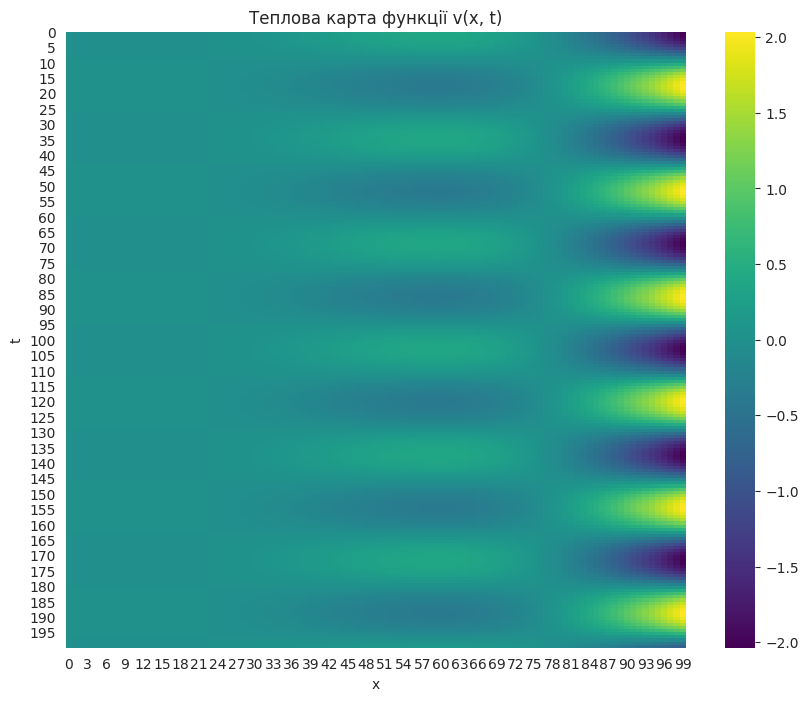

In [ ]:

# Побудова теплової карти засобами Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(v_val, cmap='viridis')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Теплова карта функції v(x, t)')
plt.show()

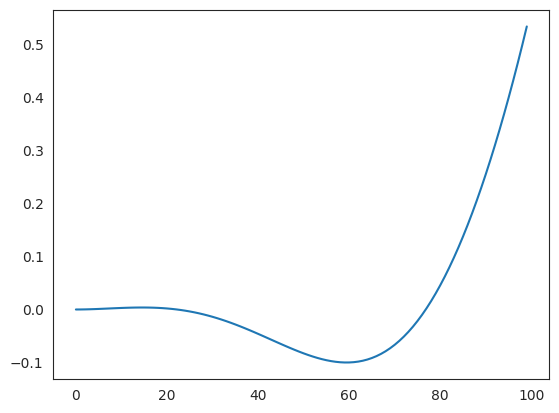

In [ ]:
plt.plot(v_val[10,:])

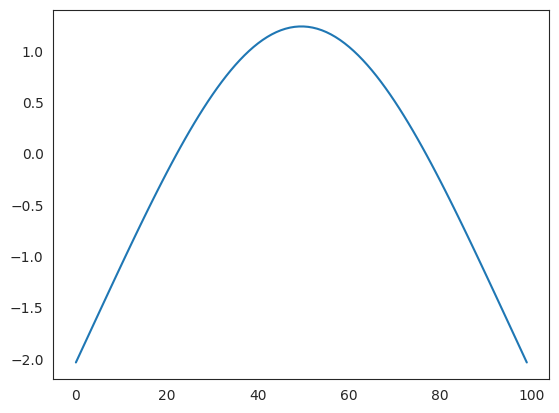

In [ ]:
plt.plot(V_val)

In [ ]:
np.max(V_val)

1.2368339420453545

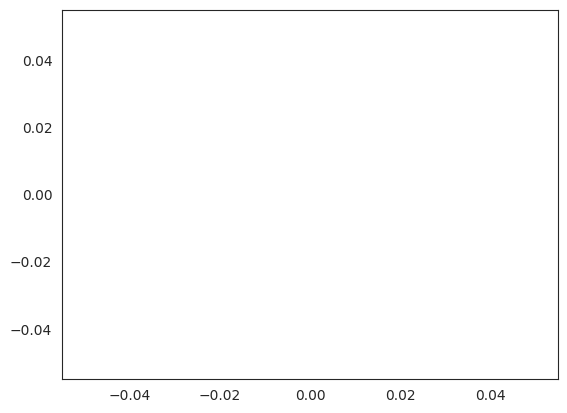

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

# Побудова анімації за допомогою FuncAnimation
fig, ax = plt.subplots()
line, = ax.plot([], [], color='blue', lw=2)

def animate(frame):
    ax.clear()
    ax.plot(x_val, v_val[frame, :], color='blue', lw=2)
    ax.set_xlim(0, 1)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('Просторова координата (x)')
    ax.set_ylabel('Амплітуда коливань (u)')
    ax.set_title(f'Коливання балки в момент часу t = {t_val[frame]:.2f}')


In [ ]:
anim = FuncAnimation(fig, animate, frames=len(t_val), interval=50, repeat=True)


anim


In [ ]:
# Define the Neural Network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.net = torch.nn.Sequential(
            nn.Linear(2,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,128),
            # # # nn.Sigmoid(),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128,1)

            nn.Linear(2,20),
            nn.Tanh(),
            # nn.Linear(20,30),
            # nn.Tanh(),
            # nn.Linear(30,30),
            # nn.Tanh(),
            # nn.Linear(30,20),
            # nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,1)

        )

    def forward(self, x):
        out = self.net(x)
        return out

In [ ]:
'''
x_test = torch.arange(-1,1+0.1, 0.1)
#print(x_test)
t_test = torch.arange(0,1+0.1, 0.1)
#print(t_test)

X = torch.stack(torch.meshgrid(x_test,t_test)).reshape(2,-1).T
#print(X)

bc1_test = torch.stack(torch.meshgrid(x_test[-1],t_test)).reshape(2,-1).T
#print(bc1_test)
#print(torch.meshgrid(x_test,t_test))

y_train_test = torch.tensor([1,2,3,4])
print(y_train_test)
y_train_test = y_train_test.unsqueeze(1)
print(y_train_test)
'''

'\nx_test = torch.arange(-1,1+0.1, 0.1)\n#print(x_test)\nt_test = torch.arange(0,1+0.1, 0.1)\n#print(t_test)\n\nX = torch.stack(torch.meshgrid(x_test,t_test)).reshape(2,-1).T\n#print(X)\n\nbc1_test = torch.stack(torch.meshgrid(x_test[-1],t_test)).reshape(2,-1).T\n#print(bc1_test)\n#print(torch.meshgrid(x_test,t_test))\n\ny_train_test = torch.tensor([1,2,3,4])\nprint(y_train_test)\ny_train_test = y_train_test.unsqueeze(1)\nprint(y_train_test)\n'

In [ ]:
# x_tmp = torch.arange(0,1+0.1, 0.1)
# t_tmp = torch.arange(0,2+0.1, 0.1)

# print(x_tmp.shape)
# print(t_tmp.shape)


# tmp = torch.stack(torch.meshgrid(x_tmp, t_tmp)).reshape(2,-1).T
# print(tmp)

In [ ]:
# y = torch.tensor([2.0, 5, 1])
# y_hat = torch.tensor([1.0, 7, -3])
# loss_test = torch.nn.MSELoss()(y, y_hat)
# print(loss_test.item())

In [ ]:
class Net:
    def __init__(self, E, I, rho, A):
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

        print(self.device)

        self.model = NN().to(self.device)

        self.E = E
        self.I = I
        self.rho = rho
        self.A = A

        # comp. domain
        self.h = 0.01
        self.k = 0.01
        self.loss_hist = []

        self.n_epochs = 10000

        x = torch.arange(0, 1 + self.h, self.h)
        t = torch.arange(0, 1 + self.k, self.k)

        self.X = torch.stack(torch.meshgrid(x, t)).reshape(2, -1).T

        print(x.shape)
        print(t.shape)

        self.X.requires_grad = True
        self.X.retain_graph = True

        self.X = self.X.to(self.device)

        # train data
        self.bc1 = torch.stack(torch.meshgrid(x[0],t)).reshape(2,-1).T

        print(self.bc1)

        self.bc2 = torch.stack(torch.meshgrid(x[-1],t)).reshape(2,-1).T

        print(self.bc2)

        self.ic  = torch.stack(torch.meshgrid(x,t[0])).reshape(2,-1).T

        print(self.ic)

        self.bc1.requires_grad = True
        self.bc2.requires_grad = True
        self.bc1.retain_graph = True
        self.bc1.retain_graph = True

        self.bc1 = self.bc1.to(self.device)
        self.bc2 = self.bc2.to(self.device)
        self.ic = self.ic.to(self.device)


        # optimizer setting
        self.adam =  torch.optim.Adam(self.model.parameters(), lr=1e-4)
        # self.adam = torch.optim.SGD(self.model.parameters(), lr=1e-3)
        # self.adam = torch.optim.Adamax(self.model.parameters(), lr=1e-3)
        # self.adam = torch.optim.NAdam(self.model.parameters(), lr=1e-3)
        # self.adam = torch.optim.RMSprop(self.model.parameters(), lr=1e-3)

        #Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS)
        self.optimizer = torch.optim.LBFGS(
            self.model.parameters(),
            lr=0.01,
            max_iter = 50000,
            max_eval = 50000,
            history_size = 50,
            tolerance_grad = 1e-7,
            tolerance_change = 1.0* np.finfo(float).eps,
            # line_search_fn ="strong_wolfe"
        )

        self.criterion = torch.nn.MSELoss()
        # self.criterion = torch.nn.L1Loss()
        self.iter = 1

    def loss_func(self):
        self.adam.zero_grad()
        self.optimizer.zero_grad()

        u1 = self.model(self.bc1)
        u2 = self.model(self.bc2)


######### Boundary condition L=0

        du1_dX = torch.autograd.grad(
            u1,
            self.bc1,
            grad_outputs = torch.ones_like(u1),
            create_graph = True,
            retain_graph = True
        )[0]

        # print(du1_dX.shape)
        du1_dx = du1_dX[:,0]
        du1_dt = du1_dX[:,1]


        # du1_dXX = torch.autograd.grad(
        #     du1_dX,
        #     self.bc1,
        #     grad_outputs = torch.ones_like(du1_dX),
        #     create_graph = True,
        #     retain_graph = True
        # )[0]

        # du1_dxx = du1_dXX[:,0]

        # # breakpoint()

        # du1_dXXX = torch.autograd.grad(
        #     du1_dXX,
        #     self.bc1,
        #     grad_outputs = torch.ones_like(du1_dXX),
        #     create_graph = True,
        #     retain_graph = True
        # )[0]

        # du1_dxxx = du1_dXXX[:,0]

######### Boundary condition L=1

        du2_dX = torch.autograd.grad(
            u2,
            self.bc2,
            grad_outputs = torch.ones_like(u2),
            create_graph = True,
            retain_graph = True
        )[0]

        du2_dx = du2_dX[:,0]
        du2_dt = du2_dX[:,1]

        du2_dXX = torch.autograd.grad(
            du2_dX,
            self.bc2,
            grad_outputs = torch.ones_like(du2_dX),
            create_graph = True,
            retain_graph = True
        )[0]

        du2_dxx = du2_dXX[:,0]

        # breakpoint()

        du2_dXXX = torch.autograd.grad(
            du2_dXX,
            self.bc2,
            grad_outputs = torch.ones_like(du2_dXX),
            create_graph = True,
            retain_graph = True
        )[0]

        du2_dxxx = du2_dXXX[:,0]


        y_ic  = self.ic[:,0]**2
        # y_ic  = torch.sin(self.ic[:,0])

        u_ic = torch.flatten(self.model(self.ic))

        # print(y_ic)
        # print(y_ic.shape)

        # print(torch.flatten(self.model(self.ic)))
        # print(torch.flatten(self.model(self.ic)).shape)

        u1 = torch.flatten(u1)
        u_ic = torch.flatten(u_ic)

        loss_data1_l = u1
        loss_data1_r = torch.zeros_like(u1)
        loss_data2_l = self.E*self.I*du1_dx
        loss_data2_r = torch.zeros_like(du1_dx)
        loss_data3_l = self.E*self.I*du2_dxx
        loss_data3_r = torch.zeros_like(du2_dxx)
        loss_data4_l = self.E*self.I*du2_dxxx
        loss_data4_r = torch.zeros_like(du2_dxxx)
        loss_data5_l = u_ic
        loss_data5_r = y_ic

        # loss_data_l = torch.cat([u1, self.E*self.I*du1_dx, self.E*self.I*du2_dxx, self.E*self.I*du2_dxxx, u_ic])
        loss_data_l = torch.cat([u1, du1_dx, du2_dxx, du2_dxxx, u_ic])

        loss_data_r = torch.cat([torch.zeros_like(u1), torch.zeros_like(du1_dx), torch.zeros_like(du2_dxx), torch.zeros_like(du2_dxxx), y_ic])

        # if self.iter == 1:
        #     print('u1', u1.shape)
        #     print('du1_dx', du1_dx.shape)
        #     print('du2_dxx', du2_dxx.shape)
        #     print('du2_dxxx', du2_dxxx.shape)
        #     print('u_ic', u_ic.shape)
        #     print('loss_data_l', loss_data_l.shape)
        #     print('loss_data_r', loss_data_r.shape)

        loss_data1 = self.criterion(loss_data1_l, loss_data1_r)
        loss_data2 = self.criterion(loss_data2_l, loss_data2_r)
        loss_data3 = self.criterion(loss_data3_l, loss_data3_r)
        loss_data4 = self.criterion(loss_data4_l, loss_data4_r)
        loss_data5 = self.criterion(loss_data5_l, loss_data5_r)

        # if (self.iter % 100 == 0):
        #     print('\n u_ic', u_ic)
        #     print('\n y_ic', y_ic)
        #     print('\n u1', torch.flatten(u1))



        # loss_data = self.criterion(y_pred, y_pred)
        # breakpoint()

        u = self.model(self.X)

        # breakpoint()

        du_dX = torch.autograd.grad(
            u,
            self.X,
            grad_outputs = torch.ones_like(u),
            create_graph = True,
            retain_graph = True
        )[0]

        #print(du_dX)
        #print("xxxxxxxxxxxxxxxxxxxxxxxxx")
        #print(du_dX[0])


        du_dx = du_dX[:,0]
        du_dt = du_dX[:,1]


        # breakpoint()

        du_dXX = torch.autograd.grad(
            du_dX,
            self.X,
            grad_outputs = torch.ones_like(du_dX),
            create_graph = True,
            retain_graph = True
        )[0]

        du_dxx = du_dXX[:,0]
        du_dtt = du_dXX[:,1]

        # breakpoint()

        du_dXXX = torch.autograd.grad(
            du_dXX,
            self.X,
            grad_outputs = torch.ones_like(du_dXX),
            create_graph = True,
            retain_graph = True
        )[0]

        du_dxxx = du_dXXX[:,0]

        # breakpoint()

        du_dXXXX = torch.autograd.grad(
            du_dXXX,
            self.X,
            grad_outputs = torch.ones_like(du_dXXX),
            create_graph = True,
            retain_graph = True
        )[0]

        du_dxxxx = du_dXXXX[:,0]

        # breakpoint()

        loss_pde_l = self.E*self.I*du_dxxxx + self.rho*self.A*du_dtt
        # loss_pde_l = du_dxxxx + du_dtt
        loss_pde_r = torch.zeros_like(du_dxxxx)

        loss_pde = self.criterion(loss_pde_l, loss_pde_r)

        loss_data = self.criterion(loss_data_l, loss_data_r)

        loss = loss_pde + loss_data
        # loss = 10*loss_pde + 100*loss_data1 + 10*loss_data2 + 10*loss_data3 + 10*loss_data4 + 10*loss_data5

        self.loss_hist.append(loss.item())

        loss.backward()

        # breakpoint()

        if self.iter % 1000 == 0:
            print(self.iter, loss.item())
            # print('loss_pde', loss_pde.item())
            # print('loss_data', loss_data.item())
            # print('loss_data1', loss_data1.item())
            # print('loss_data2', loss_data2.item())
            # print('loss_data3', loss_data3.item())
            # print('loss_data4', loss_data4.item())
            # print('loss_data5', loss_data5.item())

            # print('loss_data1_r', loss_data1_l)

            # breakpoint()
        self.iter = self.iter+1

        return loss

    def train(self):
        self.model.train()
        for i in range(self.n_epochs):
            self.adam.step(self.loss_func)
        self.optimizer.step(self.loss_func)

    def eval_(self):
        self.model.eval()

    def plot_loss(self):
        import matplotlib.pyplot as plt

        # Створюємо список номерів ітерацій чи епох
        epochs = list(range(1, self.n_epochs))

        # Побудова графіку
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, self.loss_hist, label='Train Loss', color='blue')
        plt.title('Loss Function Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
# training
# E, I, rho, A
pinn = Net(203200, 0.03937, 34, 88.2353)
pinn.train()
# net.plot_loss()

In [ ]:
pinn.model.eval()

In [ ]:
h = 0.01
k = 0.01

x_test = torch.arange(0, 1, h)
t_test = torch.arange(0, 1, k)

X_test = torch.stack(torch.meshgrid(x_test, t_test)).reshape(2,-1).T
X_test = X_test.to(pinn.X.device)

In [ ]:
X_test

In [ ]:
X_test.shape

In [ ]:
model = pinn.model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred.reshape(len(x_test),len(t_test)).cpu().numpy()

In [ ]:
y_pred.shape

In [ ]:
y_pred

In [ ]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi=3000)
sns.heatmap(y_pred, cmap='jet')

In [ ]:
# Побудова анімації за допомогою FuncAnimation
fig, ax = plt.subplots()
line, = ax.plot([], [], color='blue', lw=2)

def animate_pinn(frame):
    ax.clear()
    ax.plot(x_test, y_pred[frame, :], color='blue', lw=2)
    ax.set_xlim(0, 1)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('Просторова координата (x)')
    ax.set_ylabel('Амплітуда коливань (u)')
    ax.set_title(f'Коливання балки в момент часу t = {t_test[frame]:.2f}')



In [ ]:
anim_pinn = FuncAnimation(fig, animate_pinn, frames=len(t_test), interval=50, repeat=True)


anim_pinn


In [ ]:
plt.plot(y_pred[:,0])